 Modellbewertung:
Mittlere quadratische Abweichung (MSE): 6.713226683812002e-07
Bestimmtheitsmaß (R²): 0.9999907752699936

 Vergleich echte vs. vorhergesagte Werte:
   Tatsächlich (Close)  Vorhergesagt
0             0.280777      0.282334
1             0.152973      0.151046
2             0.078915      0.078514
3             0.121879      0.122517
4             0.740869      0.740338
5             0.636669      0.637653
6             0.707822      0.707813
7             0.835372      0.835158
8             0.835722      0.835875
9             0.696478      0.697764


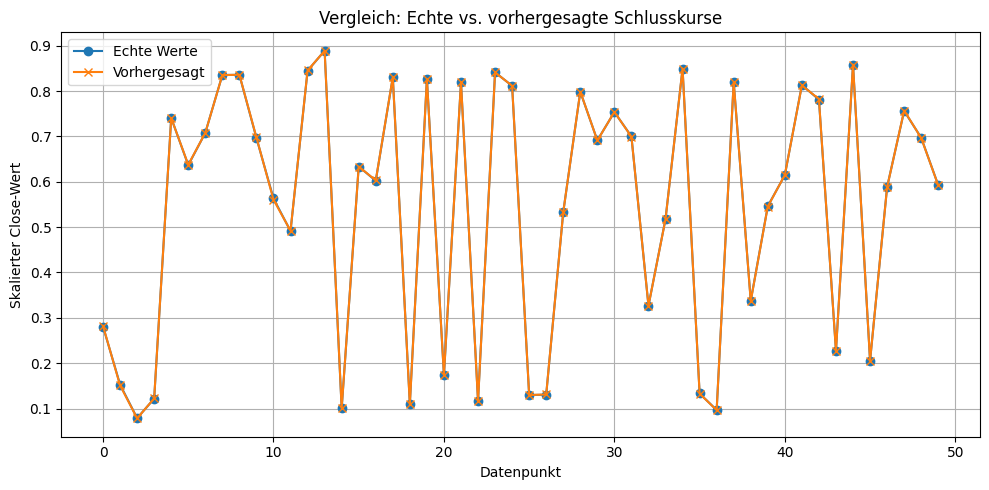

In [2]:
# Bibliotheken importieren
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("C:/Users/Nael Ackle/OneDrive - BBBaden/Dokumente/IAP/Modul 259/main.csv")

# Relevante Spalten skalieren (MinMax)
columns_to_scale = ["Open", "High", "Low", "Close", "Volume"]
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Features (X) und Zielwert (y) definieren
X = df_scaled[["Open", "High", "Low", "Volume"]]
y = df_scaled["Close"]

# Trainings- und Testdaten aufteilen (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineares Regressionsmodell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen mit Testdaten machen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Modellbewertung:")
print("Mittlere quadratische Abweichung (MSE):", mse)
print("Bestimmtheitsmaß (R²):", r2)

# Echte vs. vorhergesagte Werte vergleichen
vergleich = pd.DataFrame({
    "Tatsächlich (Close)": y_test[:10].values,
    "Vorhergesagt": y_pred[:10]
})
print("\n Vergleich echte vs. vorhergesagte Werte:")
print(vergleich)

# Plot zur Visualisierung
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Echte Werte", marker='o')
plt.plot(y_pred[:50], label="Vorhergesagt", marker='x')
plt.title("Vergleich: Echte vs. vorhergesagte Schlusskurse")
plt.xlabel("Datenpunkt")
plt.ylabel("Skalierter Close-Wert")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Bewertung des Modells

Das Modell zeigt eine nahezu perfekte Übereinstimmung zwischen den echten und vorhergesagten Schlusskursen.
Der R²-Wert liegt bei 0.99999, was bedeutet, dass das Modell fast die gesamte Varianz im Datensatz erklären kann.
Auch der sehr niedrige MSE deutet auf eine äußerst geringe durchschnittliche Abweichung hin.
Somit liefert die lineare Regression in diesem Fall sehr zuverlässige Vorhersagen.
